Importing Modules


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets
    Importing the train and test datasets

    The train dataset is the one which the model is trained, on this we can train
    different machine learning algorithms in hopes of finding the best fit for the 
    problem to be solved.

    The testing data is the dataset on which the model that has been trained 
    on the training dataset is accurate enough to solve the problem at hand.

In [3]:
train = pd.read_csv('../Titanic Project/titanic/train.csv')
test = pd.read_csv('../Titanic Project/titanic/test.csv')

In [4]:
titanic = pd.concat([train, test])

****Taking at look at the dataset.****
<br>
Checking the first and last 5 rows of the dataset.

In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking the dataset helps to confirm that all the columns are the right datatypes.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for missing values


In [11]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Here, it is to be noted that the survived, age, cabin and embarked columns 
contain missing values.
<br>
These have to be handled before feeding the data into a machine learning model

**Statistical Summary**

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### **EDA**

This involves using visualization and statistical methods to analyze data and bring the important parts of data into focus.

Survival Rate

Int64Index([0, 1], dtype='int64')

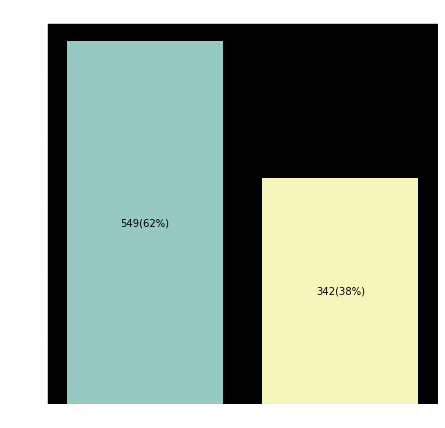

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    x= train["Survived"].value_counts().index, y=train["Survived"].value_counts(), 
    data=train
)

ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_ylabel("Frequency Count")
ax.set_title("Count of Survival", fontsize=14)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' +
        '{:.0%}'.format(bar.get_height() / len(train.Survived)) + ')',
        horizontalalignment='center', verticalalignment='center', color='black'
    )

This plot gives us an overview information that 
<br>
62% of the passengers did not survive, while <br>
38% survived

**Embarked Count**

Text(0.5, 0, 'Cities')

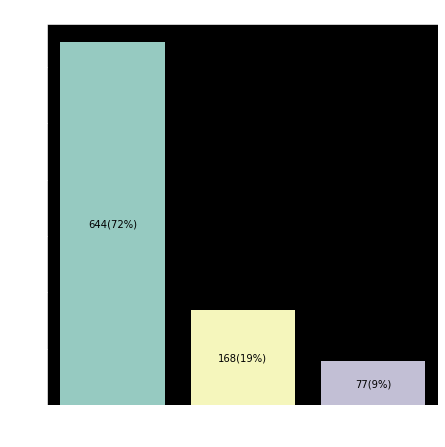

In [53]:
fig, embarked = plt.subplots(figsize=(7, 7))

sns.barplot(
    x=train['Embarked'].value_counts().index,
    y=train['Embarked'].value_counts()
)
embarked.set_xticklabels(['Southhampton', 'Chernbourg', 'Queenstowm'])
embarked.set_ylabel("Frequency Count")
embarked.set_title("Embarked Count")

for bar in embarked.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    embarked.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' + '{:.0%}'.format(bar.get_height() / len(train["Embarked"])) + ')', 
        horizontalalignment='center', verticalalignment='center', color='black')

embarked.set_title("Where did the Passenger board from?", fontsize=16)
embarked.set_xlabel("Cities", fontsize=14)
    

Here, it is make evident that a large percentage of the passengers on the ship boarded from Sounthhampton with 72%, Chernbourg(19%), Queenstown(9%)


**Categories Variables Count**